In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import the dependencies -- Done
# Load file  -- Done

# create the main dataframes for 
    # 1) Indicator (psi)
    # 2) Death rate
    # 3) readmission rate

# check if need any cleanup -- not sure we need it yet. -- Done

# Measure/indicator is the PSI Indicator
# MB: Pick one Measure/indicator to compare between hospitals in GA 
# MB: Pick one Measure/indicator to compare  between hostitals in VA 

# create the visualization 


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# filename: # VA_OutcomesMeasures_October2016_CMS_Submission
filepath = "data/VA_OutcomesMeasures_October2016_CMS_Submission.xlsx"


In [3]:
main_psi_df = pd.read_excel(filepath, sheet_name="PSI")
# main_psi_df.head()
main_dr_df = pd.read_excel(filepath, sheet_name="Death Rates")
# main_dr_df.head()
main_rr_df = pd.read_excel(filepath, sheet_name="Readmission Rate")
# main_rr_df.head()

In [4]:
# main_psi_df
working_psi_df = main_psi_df[(main_psi_df["State"]== 'VA') |    (main_psi_df["State"]== 'GA')]
# working_psi_df.head()

va_psi_df = working_psi_df[working_psi_df["State"]=="VA"]
#va_psi_df.head()

ga_psi_df = working_psi_df[working_psi_df["State"]=="GA"]
ga_psi_df.head()


,CCN#,VHA Facility,Address,City,State,Zip\nCode,Measure,Indicator,Observed Rate,Expected Rate,Risk Adjusted Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,Footnotes,Date Range
324,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),03 - Pressure Ulcer,0,0.44,0,0,0.88,NaN,October 2012 – September 2015
325,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),04 - Death Among Surgical Inpatients,141.03,128.09,131.58,65.05,198.1,NaN,October 2012 – September 2015
326,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),06 - Iatrogenic Pneumothorax,0.58,0.27,0.72,0.33,1.11,NaN,October 2012 – September 2015
327,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),07 - CLAB Infections,0.49,0.24,0.42,0.09,0.76,NaN,October 2012 – September 2015
328,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),08 - Postop Hip Fracture,0.58,0.04,0.58,0.26,0.89,NaN,October 2012 – September 2015


In [5]:
ga_psi_df
ga_psi_df.head()

,CCN#,VHA Facility,Address,City,State,Zip\nCode,Measure,Indicator,Observed Rate,Expected Rate,Risk Adjusted Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,Footnotes,Date Range
324,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),03 - Pressure Ulcer,0,0.44,0,0,0.88,NaN,October 2012 – September 2015
325,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),04 - Death Among Surgical Inpatients,141.03,128.09,131.58,65.05,198.1,NaN,October 2012 – September 2015
326,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),06 - Iatrogenic Pneumothorax,0.58,0.27,0.72,0.33,1.11,NaN,October 2012 – September 2015
327,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),07 - CLAB Infections,0.49,0.24,0.42,0.09,0.76,NaN,October 2012 – September 2015
328,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),08 - Postop Hip Fracture,0.58,0.04,0.58,0.26,0.89,NaN,October 2012 – September 2015


In [6]:
ga_psi_df['Observed Rate']= ga_psi_df['Observed Rate'].replace({"*": np.nan})
del ga_psi_df["Footnotes"]
ga_psi_df = ga_psi_df.dropna()
ga_psi_df.head()

<ipython-input-6-767ffe019e4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_psi_df['Observed Rate']= ga_psi_df['Observed Rate'].replace({"*": np.nan})


,CCN#,VHA Facility,Address,City,State,Zip\nCode,Measure,Indicator,Observed Rate,Expected Rate,Risk Adjusted Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,Date Range
324,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),03 - Pressure Ulcer,0.00,0.44,0,0,0.88,October 2012 – September 2015
325,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),04 - Death Among Surgical Inpatients,141.03,128.09,131.58,65.05,198.1,October 2012 – September 2015
326,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),06 - Iatrogenic Pneumothorax,0.58,0.27,0.72,0.33,1.11,October 2012 – September 2015
327,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),07 - CLAB Infections,0.49,0.24,0.42,0.09,0.76,October 2012 – September 2015
328,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),08 - Postop Hip Fracture,0.58,0.04,0.58,0.26,0.89,October 2012 – September 2015


In [7]:
ga_psi_df['rank']=ga_psi_df['Observed Rate'].rank(ascending=False)
ga_psi_df

,CCN#,VHA Facility,Address,City,State,Zip\nCode,Measure,Indicator,Observed Rate,Expected Rate,Risk Adjusted Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,Date Range,rank
324,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),03 - Pressure Ulcer,0.00,0.44,0,0,0.88,October 2012 – September 2015,26.5
325,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),04 - Death Among Surgical Inpatients,141.03,128.09,131.58,65.05,198.1,October 2012 – September 2015,1.0
326,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),06 - Iatrogenic Pneumothorax,0.58,0.27,0.72,0.33,1.11,October 2012 – September 2015,13.5
327,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),07 - CLAB Infections,0.49,0.24,0.42,0.09,0.76,October 2012 – September 2015,15.0
328,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),08 - Postop Hip Fracture,0.58,0.04,0.58,0.26,0.89,October 2012 – September 2015,13.5
329,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),09 - Postop Hemorrhage or Hematoma,4.90,5.8,4.35,1.57,7.13,October 2012 – September 2015,7.0
330,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),10 - Postop Physiologic and Metabolic Derangem...,2.23,0.93,1.72,0.47,2.97,October 2012 – September 2015,11.0
331,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),11 - Postop Respiratory Failure,15.68,8.73,18.12,11.77,24.47,October 2012 – September 2015,4.0
332,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),12 - Postop Pulmonary Embolism or DVT,4.64,4.4,5.32,2.28,8.37,October 2012 – September 2015,9.0
333,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),13 - Postop Sepsis,43.90,11.45,36.68,24.57,48.8,October 2012 – September 2015,3.0


In [8]:
ga_psi_df['rank'].apply(round)
ga_psi_df['rank']= ga_psi_df['rank'].apply(round)

In [9]:
ga_psi_df


,CCN#,VHA Facility,Address,City,State,Zip\nCode,Measure,Indicator,Observed Rate,Expected Rate,Risk Adjusted Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,Date Range,rank
324,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),03 - Pressure Ulcer,0.00,0.44,0,0,0.88,October 2012 – September 2015,26
325,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),04 - Death Among Surgical Inpatients,141.03,128.09,131.58,65.05,198.1,October 2012 – September 2015,1
326,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),06 - Iatrogenic Pneumothorax,0.58,0.27,0.72,0.33,1.11,October 2012 – September 2015,14
327,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),07 - CLAB Infections,0.49,0.24,0.42,0.09,0.76,October 2012 – September 2015,15
328,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),08 - Postop Hip Fracture,0.58,0.04,0.58,0.26,0.89,October 2012 – September 2015,14
329,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),09 - Postop Hemorrhage or Hematoma,4.90,5.8,4.35,1.57,7.13,October 2012 – September 2015,7
330,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),10 - Postop Physiologic and Metabolic Derangem...,2.23,0.93,1.72,0.47,2.97,October 2012 – September 2015,11
331,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),11 - Postop Respiratory Failure,15.68,8.73,18.12,11.77,24.47,October 2012 – September 2015,4
332,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),12 - Postop Pulmonary Embolism or DVT,4.64,4.4,5.32,2.28,8.37,October 2012 – September 2015,9
333,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,30901.0,Patient Safety Indicators (PSI),13 - Postop Sepsis,43.90,11.45,36.68,24.57,48.8,October 2012 – September 2015,3


Text(0.5, 1.0, 'Patient Safety Indicator by VHA Facilities in Georgia')

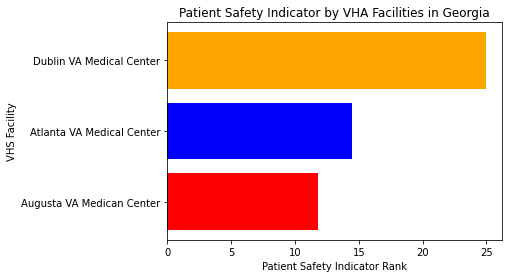

In [10]:
# Group by VHA Facility
ga_grouped_hos = ga_psi_df.groupby(['VHA Facility'])

# Creating visualization
y_axis = np.arange(len(ga_grouped_hos['VHA Facility']))
plt.barh(y_axis,ga_grouped_hos['rank'].mean(), color=["red","blue","orange"])

# # Making pretty
tick_locations = y_axis
plt.yticks(np.arange(3), (['Augusta VA Medican Center','Atlanta VA Medical Center', 'Dublin VA Medical Center']))
plt.xlabel("Patient Safety Indicator Rank")
plt.ylabel("VHS Facility")
plt.title("Patient Safety Indicator by VHA Facilities in Georgia")

In [11]:
va_psi_df
va_psi_df.head()

,CCN#,VHA Facility,Address,City,State,Zip\nCode,Measure,Indicator,Observed Rate,Expected Rate,Risk Adjusted Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,Footnotes,Date Range
1404,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),03 - Pressure Ulcer,0,0.46,0,0,1.29,NaN,October 2012 – September 2015
1405,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),04 - Death Among Surgical Inpatients,*,*,*,*,*,*Rates are not reported for Observations < 25,October 2012 – September 2015
1406,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),06 - Iatrogenic Pneumothorax,0,0.26,0,0,0.61,NaN,October 2012 – September 2015
1407,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),07 - CLAB Infections,0,0.31,0,0,0.44,NaN,October 2012 – September 2015
1408,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),08 - Postop Hip Fracture,0,0.04,0,0,0.75,NaN,October 2012 – September 2015


In [12]:
va_psi_df['Observed Rate']= va_psi_df['Observed Rate'].replace({"*": np.nan})
del va_psi_df["Footnotes"]
va_psi_df = va_psi_df.dropna()
va_psi_df.head()

<ipython-input-12-97c371325658>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  va_psi_df['Observed Rate']= va_psi_df['Observed Rate'].replace({"*": np.nan})


,CCN#,VHA Facility,Address,City,State,Zip\nCode,Measure,Indicator,Observed Rate,Expected Rate,Risk Adjusted Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,Date Range
1404,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),03 - Pressure Ulcer,0.00,0.46,0,0,1.29,October 2012 – September 2015
1406,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),06 - Iatrogenic Pneumothorax,0.00,0.26,0,0,0.61,October 2012 – September 2015
1407,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),07 - CLAB Infections,0.00,0.31,0,0,0.44,October 2012 – September 2015
1408,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),08 - Postop Hip Fracture,0.00,0.04,0,0,0.75,October 2012 – September 2015
1409,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),09 - Postop Hemorrhage or Hematoma,3.79,4.59,4.24,0,10.69,October 2012 – September 2015


In [13]:
va_psi_df['rank']=va_psi_df['Observed Rate'].rank(ascending=False)
va_psi_df

,CCN#,VHA Facility,Address,City,State,Zip\nCode,Measure,Indicator,Observed Rate,Expected Rate,Risk Adjusted Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,Date Range,rank
1404,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),03 - Pressure Ulcer,0.00,0.46,0,0,1.29,October 2012 – September 2015,29.5
1406,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),06 - Iatrogenic Pneumothorax,0.00,0.26,0,0,0.61,October 2012 – September 2015,29.5
1407,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),07 - CLAB Infections,0.00,0.31,0,0,0.44,October 2012 – September 2015,29.5
1408,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),08 - Postop Hip Fracture,0.00,0.04,0,0,0.75,October 2012 – September 2015,29.5
1409,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),09 - Postop Hemorrhage or Hematoma,3.79,4.59,4.24,0,10.69,October 2012 – September 2015,12.0
1410,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),10 - Postop Physiologic and Metabolic Derangem...,0.00,0.76,0,0,2.61,October 2012 – September 2015,29.5
1411,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),11 - Postop Respiratory Failure,17.91,9.55,18.92,8.04,29.8,October 2012 – September 2015,4.0
1412,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),12 - Postop Pulmonary Embolism or DVT,7.22,5.38,6.78,1.08,12.48,October 2012 – September 2015,10.0
1413,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),13 - Postop Sepsis,50.00,13.97,34.26,9.51,59.01,October 2012 – September 2015,3.0
1414,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),14 - Postop Wound Dehiscence,0.00,3.13,0,0,6.1,October 2012 – September 2015,29.5


In [14]:
va_psi_df['rank'].apply(round)
va_psi_df['rank']= va_psi_df['rank'].apply(round)

In [15]:
va_psi_df

,CCN#,VHA Facility,Address,City,State,Zip\nCode,Measure,Indicator,Observed Rate,Expected Rate,Risk Adjusted Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,Date Range,rank
1404,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),03 - Pressure Ulcer,0.00,0.46,0,0,1.29,October 2012 – September 2015,30
1406,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),06 - Iatrogenic Pneumothorax,0.00,0.26,0,0,0.61,October 2012 – September 2015,30
1407,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),07 - CLAB Infections,0.00,0.31,0,0,0.44,October 2012 – September 2015,30
1408,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),08 - Postop Hip Fracture,0.00,0.04,0,0,0.75,October 2012 – September 2015,30
1409,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),09 - Postop Hemorrhage or Hematoma,3.79,4.59,4.24,0,10.69,October 2012 – September 2015,12
1410,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),10 - Postop Physiologic and Metabolic Derangem...,0.00,0.76,0,0,2.61,October 2012 – September 2015,30
1411,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),11 - Postop Respiratory Failure,17.91,9.55,18.92,8.04,29.8,October 2012 – September 2015,4
1412,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),12 - Postop Pulmonary Embolism or DVT,7.22,5.38,6.78,1.08,12.48,October 2012 – September 2015,10
1413,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),13 - Postop Sepsis,50.00,13.97,34.26,9.51,59.01,October 2012 – September 2015,3
1414,49006F,HAMPTON VA MEDICAL CENTER,100 EMANCIPATION DRIVE,HAMPTON,VA,23667.0,Patient Safety Indicators (PSI),14 - Postop Wound Dehiscence,0.00,3.13,0,0,6.1,October 2012 – September 2015,30


Text(0.5, 1.0, 'Patient Safety Indicator by VHA Facilities in Virginia')

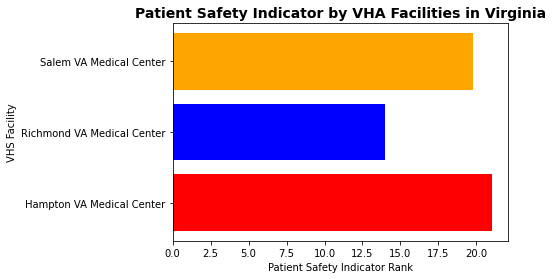

In [16]:
# Group by VHA Facility
va_grouped_hos = va_psi_df.groupby(['VHA Facility'])

# Creating visualization
y_axis = np.arange(len(va_grouped_hos['VHA Facility']))
plt.barh(y_axis,va_grouped_hos['rank'].mean(), color=["red","blue","orange"])

# # Making pretty
tick_locations = y_axis
plt.yticks(np.arange(3), (['Hampton VA Medical Center','Richmond VA Medical Center', 'Salem VA Medical Center']))
plt.xlabel("Patient Safety Indicator Rank")
plt.ylabel("VHS Facility")
plt.title("Patient Safety Indicator by VHA Facilities in Virginia",fontweight="bold",fontsize="14")
